In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(99)

In [3]:
def forward_prop_lin(W, X, b):
    h = np.dot(W.T, X) + b
    return h 

In [4]:
def forward_prop_tanh(W, X, b):
    h = np.dot(W.T, X) + b
    a = np.tanh(h)
    return a,h

In [5]:
def cost_quadratic(yt, y):
    return 0.5 * np.square(yt - y)

In [6]:
def d_cost_quadratic(yt, y):
    return yt -y

In [7]:
def init_param(num_input, num_hidden, num_output):
    WL1 = np.random.uniform(low=-0.5, high=0.5, size=(num_hidden, num_output))
    b1 = np.random.uniform(low=-0.5, high=0.5, size=(num_output,1))
    W10 = np.random.uniform(low=-0.5, high=0.5, size=(num_input, num_hidden))
    b0 = np.random.uniform(low=-0.5, high=0.5, size=(num_hidden,1))

    return WL1, W10, b1, b0

In [8]:
def d_tanh(X):
    return 1. - np.square(np.tanh(X))

In [9]:
def backprop_L1(yt, y, a_1, p):
    dy = d_cost_quadratic(yt, y)
    #linear activation function -> identity

    dW = np.dot(a_1,dy.T)/p
    db = np.sum(dy, axis=1, keepdims=True)/p
    d_l = dy
    
    return dW, db, d_l

In [10]:
def backprop_10(d_l, WL1, h_1, x, p):
    df = d_tanh(h_1) 
    d_0 = np.multiply(np.dot(WL1, d_l), df) # 3*10
    dW =  np.dot(x, d_0.T) / p
    db = np.sum(d_0, axis=1, keepdims=True) / p

    return dW, db, d_0

Loading the Data

In [11]:
data = np.loadtxt('RegressionData.txt')
X = data[:,0].reshape((1,-1))
y = data[:,1].reshape((1,-1))
p = float(X.shape[1])

In [60]:
num_input = 1
num_hidden = 3
num_output = 1

max_iter = 20000

learning_rate = 0.5

In [61]:
def train_network(W_L1, W_10, b_1, b_0, X, y):
    costs = np.ones(max_iter)
    for i in range(max_iter):
        # forward proap
        a_1, h_1 = forward_prop_tanh(W_10,X,b_0)
        a_2 = forward_prop_lin(W_L1, a_1, b_1)
        
        cost = cost_quadratic(y, a_2)
        
        #backprop
        dw_l1, db_1, d_l = backprop_L1(y,a_2,a_1, p)
        dw_10, db_0, d_0 = backprop_10(d_l, W_L1, h_1, X, p)

        #updating weight
        W_L1 += learning_rate * dw_l1
        W_10 += learning_rate * dw_10

        b_1 += learning_rate*db_1
        b_0 += learning_rate*db_1

        costs[i] = cost.mean()/p

    return W_L1, W_10, b_1, b_0, costs

In [62]:
def predict(W_L1, W_10, b_1, b_0, X):
    a_1, _ = forward_prop_tanh(W_10,X,b_0)
    a_2 = forward_prop_lin(W_L1, a_1, b_1)

    return a_2, a_1

In [63]:
WL1, W10, b1, b0 = init_param(num_input, num_hidden, num_output)

In [64]:
WL1, W10, b1, b0, costs = train_network(WL1, W10, b1,b0, X, y)

In [76]:
x = np.linspace(1,max_iter,max_iter)
X_test = np.linspace(0,1,100)

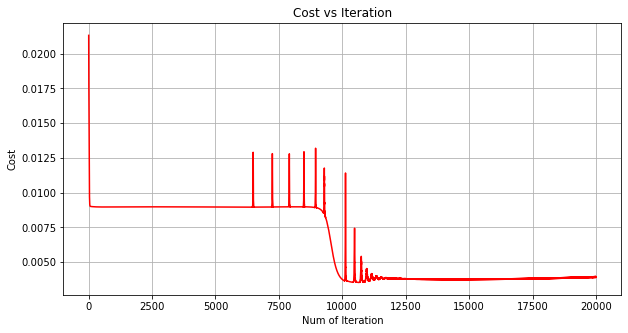

In [77]:
plt.figure(figsize=(10,5))

plt.plot(x,costs, label='Average Cost', c='red')

plt.title('Cost vs Iteration')
plt.xlabel('Num of Iteration')
plt.ylabel('Cost')

plt.grid()
plt.show()

In [80]:
y_pred, a1_pred = predict(WL1, W10, b1, b0, X_test.reshape((1,-1)))

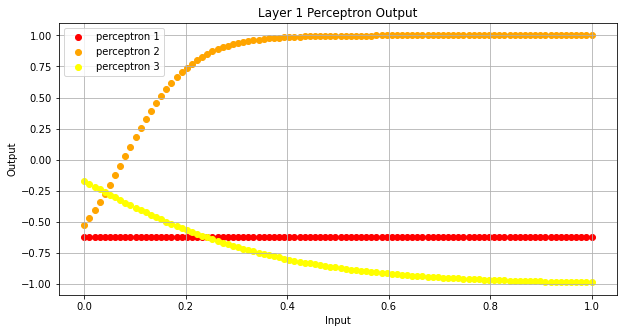

In [82]:
plt.figure(figsize=(10,5))

plt.title('Layer 1 Perceptron Output')

plt.scatter(X_test, a1_pred[0,:], label='perceptron 1', c='red')
plt.scatter(X_test, a1_pred[1,:], label='perceptron 2', c='orange')
plt.scatter(X_test, a1_pred[2,:], label='perceptron 3', c='yellow')

plt.xlabel('Input')
plt.ylabel('Output')

plt.grid()
plt.legend()
plt.show()

In [69]:
X

array([[0.5503, 0.9206, 0.5359, 0.6081, 0.0202, 0.8545, 0.2357, 0.4847,
        0.3996, 0.1957]])

ValueError: x and y must be the same size

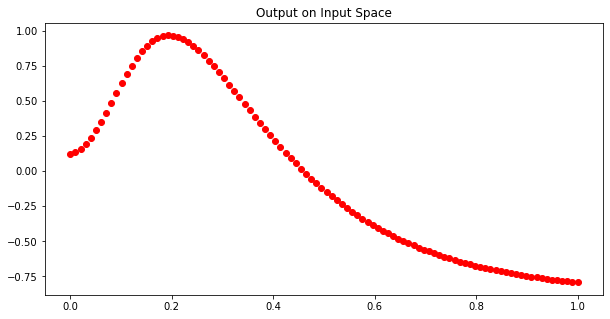

In [83]:
plt.figure(figsize=(10,5))

plt.title('Output on Input Space')

plt.scatter(X, y_pred, label='prediction', c='red')
plt.scatter(X, y, label='ground truth', c='green')

plt.xlabel('Input')
plt.ylabel('Output')

plt.grid()
plt.legend()
plt.show()

new weights and biases

In [71]:
WL1_1, W10_1, b1_1, b0_1 = init_param(num_input, num_hidden, num_output)
WL1_1, W10_1, b1_1, b0_1, costs_1 = train_network(WL1_1, W10_1, b1_1, b0_1, X, y)

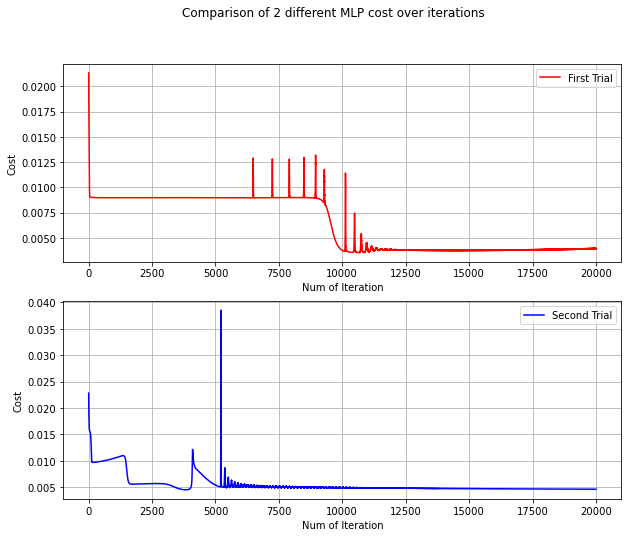

In [72]:
fig, axs = plt.subplots(2, 1,figsize=(10,8))

fig.suptitle('Comparison of 2 different MLP cost over iterations')

axs[0].plot(x,costs, label='First Trial', c='red')
axs[0].set_xlabel('Num of Iteration')
axs[0].set_ylabel('Cost')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,costs_1, label='Second Trial', c='blue')
axs[1].set_xlabel('Num of Iteration')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.show()

In [73]:
y_pred_1, a1_pred_1 = predict(WL1_1, W10_1, b1_1, b0_1, X)

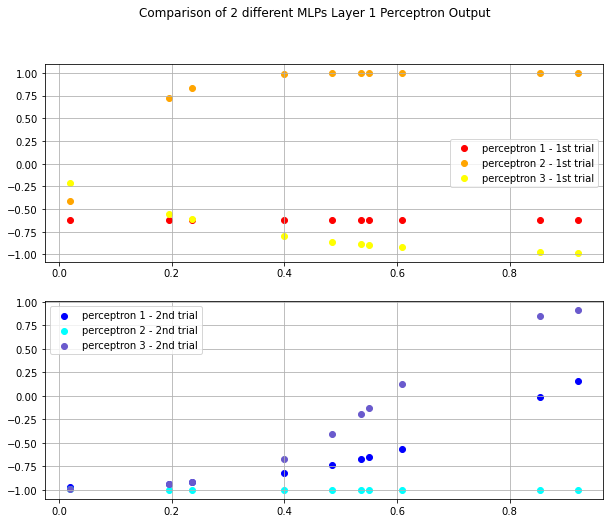

In [74]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

fig.suptitle('Comparison of 2 different MLPs Layer 1 Perceptron Output')

axs[0].scatter(X, a1_pred[0,:], label='perceptron 1 - 1st trial', c='red')
axs[0].scatter(X, a1_pred[1,:], label='perceptron 2 - 1st trial', c='orange')
axs[0].scatter(X, a1_pred[2,:], label='perceptron 3 - 1st trial', c='yellow')
axs[0].legend()
axs[0].grid()

axs[1].scatter(X, a1_pred_1[0,:], label='perceptron 1 - 2nd trial', c='blue')
axs[1].scatter(X, a1_pred_1[1,:], label='perceptron 2 - 2nd trial', c='aqua')
axs[1].scatter(X, a1_pred_1[2,:], label='perceptron 3 - 2nd trial', c='slateblue')
axs[1].legend()
axs[1].grid()

plt.show()

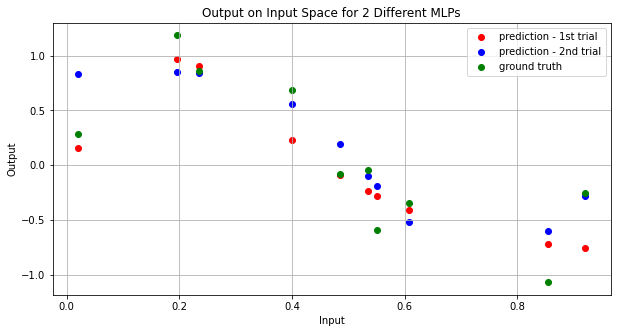

In [75]:
plt.figure(figsize=(10,5))

plt.title('Output on Input Space for 2 Different MLPs')

plt.scatter(X, y_pred, label='prediction - 1st trial', c='red')
plt.scatter(X, y_pred_1, label='prediction - 2nd trial', c='blue')
plt.scatter(X, y, label='ground truth', c='green')

plt.xlabel('Input')
plt.ylabel('Output')

plt.grid()
plt.legend()
plt.plot()

plt.show()

#### Differences of 2 MLPs

The obvious differences can be seen on the layer 1 perceptron output. Since the gradient of the weights one layer 1 (W_l1) depends on the activation values of its perceptron, the direction of the gradient descent certainly would be influenced by the initial value of the layer before (W_10). Thus difference initialisation gives different direction. 

However, at the output layer, the MLPs fairly seem to have the same result. This means, if we continue to train both MLPs, the differences would get smaller. This indicaties symmetric properties of MLP.

#### Choice of Error Function

Quadratic error function  assume that the noise of the data follows gaussian distribution. The error function also would minimize the variance between predicted and training data. 
Since it is mentioned that the data was added a gaussian noise, using quadratic error function would correct. Furthermore it is quite safe to assume for any dataset to have a gaussian noise embedded.     